### 1. Missing completely at Random (MCAR)
### 2.missing at Random (MAR)
### 3.Missing data not at random(MNAR)

#### ......................................................................................................................

In [1]:
import seaborn as sns
import numpy as np

In [4]:
df=sns.load_dataset('titanic')

In [5]:
df.head

<bound method NDFrame.head of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_mal

In [8]:
## Check missing values in dataset ---> Sum
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

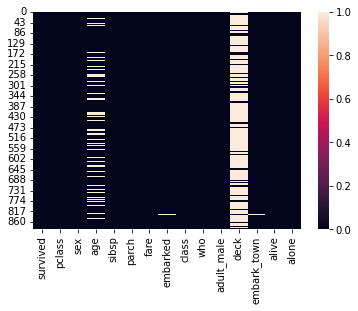

In [9]:
sns.heatmap(df.isnull())

### Handling missing values by deleting row & column 

In [12]:
## Row-wise Null value deletion 
df.dropna().shape

(182, 15)

In [14]:
## column-wise Null value  deletion
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


In [15]:
## Imputation Technqiues 
## (1)- Mean value imputaion 

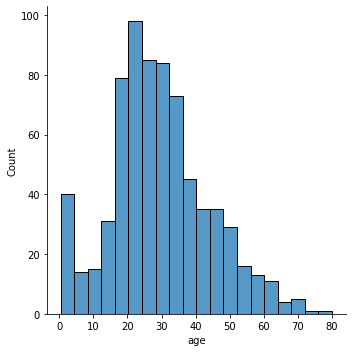

In [19]:
sns.displot(df['age'])

In [20]:
df.age.isnull().sum()

177

In [33]:
df['age_mean']=df['age'].fillna(np.mean(df['age']))   ## this technique work when our data is normally distributed

In [34]:
df[['age_mean','age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


### 2- Median Value Imputation 

In [23]:
df["age_median"]=df['age'].fillna(df['age'].median())

In [35]:
df[['age_mean','age_median','age']]

,age_mean,age_median,age
0,22.000000,22.0,22.0
1,38.000000,38.0,38.0
2,26.000000,26.0,26.0
3,35.000000,35.0,35.0
4,35.000000,35.0,35.0
5,29.699118,28.0,NaN
6,54.000000,54.0,54.0
7,2.000000,2.0,2.0
8,27.000000,27.0,27.0
9,14.000000,14.0,14.0


### 3- Mode vale Imputation --Categorical

In [37]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [38]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [45]:
df[df['age'].notnull()]['embarked'].mode()[0]

'S'

In [46]:
mode=df[df['age'].notnull()]['embarked'].mode()[0]

In [47]:
df['embarked_mode']=df['embarked'].fillna(mode)

In [53]:
df['embarked_mode'].isnull().sum()

0